#Algebra Linear aplicada ao jogo TETRIS

Luiz Carlos Ferreira Carvalho - 120025788

Thalita de Freitas Silva - 120048493

Vitoria Mendes Cortes Chaves - 120045487

Sumário:

I - Construindo o TETRIS: Translação e Rotação.

II - Analisar algoritmo de sorteio de peças do TETRIS de GameBoy com Markov.

III - Usar minimos quadrados para analisar esgotamento de peças entre os algortimos de sorteio de peças.

In [ ]:
#@title
import numpy as np
from fractions import Fraction
from random import randint, shuffle
import matplotlib.pyplot as plt
from copy import deepcopy
import array as arr

def imprimeVetorFracao(vetor):
  vetorFracao = []

  for i in range(len(vetor)):
    auxStr = str(Fraction(vetor[i]).limit_denominator())
    vetorFracao.append(auxStr)

  print("\n", np.array(vetorFracao), "\n")

def imprimeMatrizFracao(matriz):

  matrixFracao = []

  for i in range(len(matriz)):
    auxStr = []
    for j in range(len(matriz[0])):
      auxStr.append(str(Fraction(matriz[i][j]).limit_denominator()))

    matrixFracao.append(auxStr)

  print("\n", np.array(matrixFracao), "\n")

# Introdução

O TETRIS é um jogo composto por um tabuleiro com tamanho $20x10$, onde o jogador deve empilhar $7$ peças diferentes chamadas tetrominos de forma continua obtendo pontos sempre que conseguir preencher linhas, limpando-as do tabuleiro e permitindo que o jogo continue.

Os tetrominos possuem formatos diferentes: $O$, $T$, $S$, $Z$, $I$, $L$, $J$.

Uma forma simples e intuitiva de representar o tabuleiro é na forma de uma matriz:

  $$
 T_{20,10} = \begin{bmatrix}
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
  0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
  0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
  0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
 0 & 0  & 0 & 0  & 0  & 0 & 0 & 0 & 0 & 0  \\
\end{bmatrix}
$$
$$$$
E também podemos representar os tetrominos como matrizes:
$$$$
  $$
 I_{4,4} = \begin{bmatrix}
 0 & 0  & 0 & 0   \\
 1 & 1  & 1 & 1   \\
 0 & 0  & 0 & 0   \\
 0 & 0  & 0 & 0   \\
\end{bmatrix}
$$

$$$$

  $$
 O_{2,2} = \begin{bmatrix}
 1 & 1  \\
 1 & 1   \\
\end{bmatrix}
$$

$$$$

  $$
 J_{3,3} = \begin{bmatrix}
 1 & 0  & 0   \\
 1 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}
$$

$$$$

  $$
 L_{3,3} = \begin{bmatrix}
 0 & 0  & 1   \\
 1 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}
$$

$$$$

  $$
 S_{3,3} = \begin{bmatrix}
 0 & 1  & 1   \\
 1 & 1  & 0   \\
 0 & 0  & 0   \\
\end{bmatrix}
$$

$$$$

  $$
 Z_{3,3} = \begin{bmatrix}
 1 & 1  & 0   \\
 0 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}
$$

$$$$

  $$
 T_{3,3} = \begin{bmatrix}
 0 & 1  & 0   \\
 1 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}
$$


$$$$

Em cada partida o jogador deve controlar os tetrominos que são sorteados e que "caem" com o tempo, movendo-os de para encaixa-los na base no tabuleiro de forma que linhas fechadas são limpas e somam pontos, o que permite que o jogo prossiga, além disso o jogador pode rotacionar as peças no sentido horario, porém nunca pode move-las de volta para cima. Conforme o jogador marca pontos, as peças passam a cair de forma mais rápida.

Dependendo da versão o jogo pode ser levemente diferente, versões classicas e mais antigas possuem algoritmos diferentes para sortear as peças, além de não permitir em alguns casos que o jogador guarde uma peça na reserva e a troque conforme achar conveniente, além de que alguns jogos não permitiam o hard drop, que consiste em instantaneamente descer a peça, gerando mais pontos.

#Parte I - Construindo o Jogo

Para criar o jogo decidimos construir um site usando html, css e javascript de forma que qualquer pessoa pode jogar sem a necessidade de instalar algum compilador ou coisa parecida.

O código se encontra no seguinte link: https://github.com/luizferreira7/tetris

E pode ser jogado em: https://luizferreira7.github.io/tetris/

Em nossa versão também decidimos eliminar o hard drop e a possibilidade de guardar peças, para simplificar o jogo, também alteramos o sistema de pontuação e removemos o aumento da velocidade de descida ou "queda" dos tetrominos.

Para gerar os tetrominos implementamos uma versão do algoritmo da mochila, que consiste em colocar os 7 tetrominos em uma lista e embaralhar a ordem aleatóriamente, escolhendo sempre o ultimo da lista como próxima peça e removendo-a da lista, ate que a mesma se esgote para então preenche-la novamente com 7 tetrominos repetindo o processo e de forma semelhante a colocar as peças em uma mochila e remove-las ao acaso.

O jogo consiste em uma matriz $20x10$ que chamaremos de $M_{20,10}$, populada com zeros, que então é usada para desenhar o tabuleiro, para tal utilizamos o canvas, que é uma ferramenta criada para delimitar uma área de renderização dinâmica de gráficos.

No nosso caso estamos utilizando o contexto bidimensional já que esse destina-se à criação de imagens em duas dimensões x e y, segundo um sistema de eixos cartesianos, cuja origem é no canto superior esquerdo da área de criação, com as coordenadas x crescendo da esquerda para direita e y de cima para baixo.

![](https://raw.githubusercontent.com/luizferreira7/tetris/main/assets/canvas_default_grid.png)

Assim sincronizamos nosso canvas com a matriz do tabuleiro do jogo e sempre que o valor for 0 pintamos a região correspondente com a cor escolhida para o fundo.

Quando um novo tetromino é sorteado, definimos para ele uma matriz de formato, que é usada sabermos como devemos popular nossa matriz tabuleiro quando precisarmos fixar o tetromino e como devemos representa-la no canvas.
Além disso damos a peça sorteada as coordenadas iniciais $x = 4$ e $y = 0$ defininado que o tetromino começara a cair do meio do tabuleiro.

$Tetrominó:$

$coordenadas = (x, y) = (4, 0)$

$formato = F_{i,j}$

Assim podemos ver que na realidade o TETRIS se baseia essencialmente no conceito de translação da algebra linear. Se nosso tetromino possui coordenadas $x = 6$ e $y = 7$ em algum momento do jogo isso significa que se o jogador pressionar a tecla da direita estaremos realizando $x+1$, ou seja, $x = 6+1 = 7$.
Portanto criamos então uma função de animação e uma função de jogadas nas quais o tetromino sera então transladado pelo tabuleiro das seguintas formas:

$$$$
1. Quando o jogador pressionar a seta direita do teclado:
* $x + 1$
$$$$
2. Quando o jogador pressionar a seta para esquerda do teclado:
* $x - 1$
$$$$
3. Quando o jogador pressionar a seta para baixo do teclado ou a cada 800 ms:
* $y + 1$
$$$$

Dessa forma podemos movimentar os tetrominos pelos eixos cartesianos do canvas e para podermos representa-los no tabuleiro, em outras palavras "desenha-las", usamos a matriz de formato, onde assumimos que cada elemento $F_{i,j}$ possui coordenadas:

$$(x+j, y+i)$$

Pintamos então o tabuleiro com a cor do elemento da matriz, com 0 sendo para o fundo e do 1 ao 7 sendo as cores escolhidas para cada peça, dessa forma percorremos a matriz olhando para o valor de cada elemento e desenhamos o canvas novamente.

Pelas regras do TETRIS quando uma peça não pode mais ser transladada no tabuleiro devemos fixa-la, entao para isso criamos uma função que valida a jogada executada pelo jogador ou a função de queda da peça, na qual ao somarmos ou subtrairmos suas componentes $x$ e $y$ verificamos se cada elemento da matriz formato colide com seu correspondete da matriz do tabuleiro, dessa forma se colidir e não existir mais nenhum movimento válido fixamos a peça alterando os valores da matriz de tabuleiro para os da matriz de formato do tetromino:

Para todo elemento de $F$ fazemos:

* Jogador realiza jogada ou jogo realiza descida automatica:

> Realizamos $(x+1, y)$ ou $(x-1, y)$ ou $(x, y+1)$

* Caso $F_{i,j}$ != $0$:

> Se $M_{i+y,j+x}$ != 0, então temos uma colisão

> Se $M_{i+y,j+x}$ == 0, então jogada válida

Caso seja uma colisão basta descartarmos a modificação feita em $x$ ou $y$. É dessa forma também que verificamos se a jogada está dentro do limite do tabuleiro, porém verificando se o novo valor $(x, y)$ está dentro das dimensões do tabuleiro:

* Jogador realiza jogada ou jogo realiza descida automatica:

> Realizamos $(x+1, y)$ ou $(x-1, y)$ ou $(x, y+1)$

* Caso $F_{i,j}$ != $0$:

> Se 0 <= $i+y$ < 10, então jogada válida

> Se $i+y$ < 0 ou 10 < $i+y$, então jogada fora do tabuleiro

> Se $j+x$ < 20, então jogada válida

> Se $j+x$ >= 20, então jogada fora do tabuleiro

Para podermos desenhar o tetromino no canvas basta para cada elemento $F_{i,j}$ pintar com a cor correspondente a coordenada $(x+j, y+i)$ do canvas.

Por fim restam dois métodos, primeiro verificar se uma linha foi completada, para isso basta verificar se a linha da matriz de tabuleiro se tornou diferente de 0, então nós a removemos da matriz e adicionamos uma nova linha de zero no topo, já que o canvas ao redesenhar conforme a animação ira redesenhar essas alterações da matriz tabuleiro.

Por fim o método final é o de rotacionar o tetromino executado quando o jogador pressiona a tecla de espaço em seu teclado.
Para rotacionar nossa peça basta que alteremos a matriz de formato do tetromino pois ela contem o formato que a peça ocupa no tabuleiro conforme apresentado acima na introdução, então se conseguirmos rotacionar a matriz formato em 90 graus estaremos prontos para o jogo, pois nossa animação se encarregara de redesenhar o canvas com o novo formato da peça.

Para realizarmos a rotação podemos pensar em mais alguns conceitos da algebra linear como por exemplo se nós invertermos as linhas da matriz transposta podemos alcançar a rotação que desejamos:

$$$$
  $$
 Z_{3,3} = \begin{bmatrix}
 1 & 1  & 0   \\
 0 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix} →
\begin{bmatrix}
 1 & 1  & 0   \\
 0 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}^{T}=
\begin{bmatrix}
 1 & 0  & 0   \\
 1 & 1  & 0   \\
 0 & 1  & 0   \\
\end{bmatrix}
$$
$$$$

Podemos inverter as linhas de uma matriz facilmente ao multiplicarmos pela seguinte matriz:
$$$$
$$
\begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 0   \\
 1 & 0  & 0   \\
\end{bmatrix} →
\begin{bmatrix}
 1 & 0  & 0   \\
 1 & 1  & 0   \\
 0 & 1  & 0   \\
\end{bmatrix} \begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 0   \\
 1 & 0  & 0   \\
\end{bmatrix} =
\begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 1   \\
 0 & 1  & 0   \\
\end{bmatrix}
$$
$$$$
Logo de forma geral podemos escrever:
$$$$
$$
Z_{3,3} = \begin{bmatrix}
 1 & 1  & 0   \\
 0 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix} →
\begin{bmatrix}
 1 & 1  & 0   \\
 0 & 1  & 1   \\
 0 & 0  & 0   \\
\end{bmatrix}^{T}
\begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 0   \\
 1 & 0  & 0   \\
\end{bmatrix} =
\begin{bmatrix}
 1 & 0  & 0   \\
 1 & 1  & 0   \\
 0 & 1  & 0   \\
\end{bmatrix}
\begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 0   \\
 1 & 0  & 0   \\
\end{bmatrix} =
\begin{bmatrix}
 0 & 0  & 1   \\
 0 & 1  & 1   \\
 0 & 1  & 0   \\
\end{bmatrix}
$$
$$$$
Implementamos em python um codigo que faz a rotação explicada acima.

In [ ]:
#@title
def transposta(matriz):

  l = len(matriz)

  transposta = deepcopy(matriz)

  for i in range(l):
    for j in range(l):
      transposta[j][i] = matriz[i][j]

  return transposta

def rotacao(matriz):

  l = len(matriz)

  matriz_aux = []

  for i in range(l):
    matriz_aux.append([])
    for j in range(l):
      if (j == (l-1-i)):
        matriz_aux[i].append(1)
      else:
        matriz_aux[i].append(0)

  matriz_t = transposta(matriz)

  r = np.array(matriz_t) @ np.array(matriz_aux)

  return r.tolist()


z = [[1, 1, 0], [0, 1, 1], [0, 0, 0]]

imprimeMatrizFracao(z)
print("Rotação ->")
imprimeMatrizFracao(rotacao(z))


 [['1' '1' '0']
 ['0' '1' '1']
 ['0' '0' '0']] 

Rotação ->

 [['0' '0' '1']
 ['0' '1' '1']
 ['0' '1' '0']] 



Poderiamos também usar o método $transpose()$ do numpy para facilitar a forma de encontrar a transposta alem do metodo $reverse()$ do proprio python para inverter a ordem dos elementos.

In [ ]:
#@title
def rotacao_alt(matriz):

  matriz_t = np.array(matriz).transpose()

  r = matriz_t.tolist()

  for i in range(len(r)):
    r[i].reverse()

  return r


z = [[1, 1, 0], [0, 1, 1], [0, 0, 0]]

imprimeMatrizFracao(z)
print("Rotação ->")
imprimeMatrizFracao(rotacao_alt(z))


 [['1' '1' '0']
 ['0' '1' '1']
 ['0' '0' '0']] 

Rotação ->

 [['0' '0' '1']
 ['0' '1' '1']
 ['0' '1' '0']] 



#Parte II - O algoritmo sorteador de tetrominos é enviesado?

Uma cadeia de Markov é uma sequência de váriaveis aleatórias, $X_0, X_1, X_2, ..., X_n$ onde dizemos que cada uma delas representa um estado $i$ em um determinado tempo $n$, e existe uma probabilidade fixa ($P_{ij}$) de que ela esteja a seguir em outro estado $j$. Matematicamente para $i_0$,...,$i_{n-1}$,$i$, $j$, temos:

$$P( X_{n+1}=j | X_n=i,X_{n-1}=i_{n-1},..., X_1=i_1,X_0=i_0)  = P_{ij}$$

$$→$$

$$P_{ij}(n) = P(X_{n+1} = x_j | X_n = x_i) $$

Onde os valores $P_{ij}$, $0 ≤ i ≤ M, 0 ≤ j ≤ N $ são chamados de probabilidades de transição da cadeia de Markov satisfazendo a propriedade de que o seu somatório deva ser igual a 1 para cada linha da matriz,

$$P_{ij}≥0$$  

$$\sum_{j=0}^{N} P_{ij} = 1$$

$$i = 0,1,...,M$$

Assim temos a matriz de transição:

  $$
 P = \begin{bmatrix}
 P_{0,0} & P_{0,1}  & P_{0,2} & \cdots  & P_{0,N}  &  \\
 P_{1,0} & P_{1,1}  & P_{1,2} & \cdots  & P_{1,N}  &  \\
 P_{2,0} & P_{2,1}  & P_{2,2} & \cdots  & P_{2,N} \\
 \vdots  & \vdots  & \vdots   & \ddots  & \vdots  \\
 P_{M,0} & P_{M,1} & P_{M,2}  & \cdots  & P_{M,N}
\end{bmatrix}
$$
$$$$
Sendo assim parece tentador e intuitivo usar uma cadeia de Markov para jogos de tabuleiro, onde o próximo estado do jogador (casa do tabuleiro) só depende exclusivamente do estado atual (casa do tabuleiro) e do que ele tirar nos dados, ou seja, não leva em consideração o passado, por exemplo para um jogador no estado $X_n$ pouco importa seus estados anteriores $X_{n-1}$ ou ainda $X_{n-2}$, o que importa é que seu proximo estado depende apenas do rolar dos dados, e de seu estado atual, pois com essas informações saberemos para onde ele se moverá.

Podemos então modelar um jogo de tabuleiro simples com uma cadeia de Makorv, pois a casa atual do jogador será a linha da matriz ($i$) de transição em que ele está, e cada coluna ($j$) representando as casas que ele poderá alcançar após sua jogada atual. Nesta modelagem $P_{ij}$ será a probabilidade de ir para cada nova casa, e este valor é obtido ao analisar os casos favoraveis e possiveis das rolagens dos dados, dessa forma teremos um valor fixo para tais probabilidades, por exemplo, um jogador na casa 4 independente do tempo que se passou sempre terá a mesma probabilidade de nesta rodada alcançar a casa 10, pois o par de dados se manterá o mesmo (Não confundir com a probabilidade de estar na casa 4 após $n$ rodadas).

Porém o TETRIS não é um jogo de tabuleiro simples, usar cadeias de Markov para obter probabilidades de um jogador ter uma certa pontuação dependeria exaustivamente dos estados anteriores, ou seja, de quais tetrominos (nome dado as peças do TETRIS) foram sorteadas anteriormente e de como o jogador os encaixou no tabuleiro, portanto usar cadeias de Markov para tal não é nem um pouco atrativo ou fácil, entretanto podemos utiliza-las para responder uma pergunta basante intrigante que todo jogador de TETRIS já deve ter feito: "O TETRIS é enviesado?"

É comum um jogador inicante ou casual de TETRIS imaginar se o jogo com o passar das rodadas diminui as chances de um determinado tetromino ser sorteado, podemos então modelar a nossa cadeia de Markov a partir do algortimo gerador de peças do TETRIS para responder esta questão.

Para esta analise iremos observar três algoritmos usados para versões diferentes do TETRIS:

1 - 1984: O algoritmo usado para a primeira versão do jogo, em que cada tetromino era sorteado ao caso, sem considerar o estado anterior.

Modelar o algortimo original é bastante simples, basta adicionar a probabilidade de um dado honesto de 7 faces a cada elemento da matriz de transição, pois o próximo estado não depende do atual, e o numero sorteado corresponde a um dos 7 tetrominos.

$$$$

$$
 P_{7x7} = \begin{bmatrix}
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 \\
\end{bmatrix}
$$

$$$$

2 - NES (Nintendo entertainment System): Neste algoritmo cada tetromino sorteado era comparado com o anterior e caso fosse igual era sorteado um novo, porém apenas uma vez.

Modelar o algortimo do NES também é bastante simples, já que podemos apenas adicionar um estado novo a nossa matriz anterior, que é o caso onde tiramos uma peça repetida, levando nossa matriz de transição a ser $8x8$:

$$$$

$$
 P_{8x8} = \begin{bmatrix}
 0 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 & 1/7 \\
 1/7 & 0  & 1/7 & 1/7  & 1/7 & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 0 & 1/7  & 1/7 & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 0  & 1/7 & 1/7 & 1/7 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7  & 0 & 1/7 & 1/7 & 1/7\\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 0 & 1/7 & 1/7\\
 1/7 & 1/7  & 1/7 & 1/7  & 1/7 & 1/7 & 0 & 1/7 \\
 1/7 & 1/7  & 1/7 & 1/7 & 1/7 & 1/7 & 1/7  & 0 \\
\end{bmatrix}
$$

$$$$

3 - GameBoy: O algoritmo desse jogo comparava o tetromino sorteado com os dois estados anteriores (tetromino fixado e tetromino da previa) utilizando um OR (O jogo representava os tetrominos em bits de 000 a 110, assim ao comparar um 010 com 001 tinhamos 011), caso a comparação fosse igual ao tetromino fixado ele gerava um novo tetromino, repetindo o teste duas vezes antes de assumir a peça sorteada.

![](https://raw.githubusercontent.com/luizferreira7/tetris/main/assets/GBrandomizer.png)

Exemplo: Se as peças anteriores fossem: 011 (O) e 001 (J), com a nova peça sendo 010 (I), ao comparar teriamos:

$$011 | 010 | 001 = 011$$

Logo o algortimo considerava que o I era igual ao O caso a previa fosse J e assim sorteava uma nova peça realizando novamente as comparações.

Modelar o algortimo do GameBoy é um pouco mais complicado já que estamos olhando sempre para as duas ultimas peças, temos entao 7 * 7 possibilidades, ou seja, 49 estados, neste algoritmo também temos que pensar no estado em que a nova peça sorteada é igual "igual" as duas anteriores, portanto precisamos adicionar 98 estados extras, já que estes serão os casos aonde o valor foi repetido e dependendo de quais sao as peças esse valor pode variar novamente, sendo que o sorteio definitivo também dependera do estado anterior, então não podemos criar um estado unico como no caso do NES, o resultado desta modelagem será uma matriz de transição $M_{147x147}$, porém para efeitos praticos iremos considerar que o algoritmo faz apenas uma verificação de igual e que após ela ele pode ir para para qualquer um dos outros 49 estados, sendo assim usaremos uma matriz $50x50$ resumida abaixo, porém impressa pelo código da célula a seguir.

$$$$

$$
  P_{50x50} = \begin{bmatrix}
 0 & 1/7  & 1/7 & 1/7 & 1/7 &  \cdots & 0 & \cdots & 1/7  &  \\
 0 & 0  & 0 & 0 & 0 &\cdots  & 0 &\cdots  & 0  &  \\
 0 & 0  & 0 & 0 & 0 & \cdots  & 0 &\cdots  & 0 \\
 \vdots  & \vdots  & \vdots   & \vdots  & \vdots  & \cdots  & \vdots & \ddots & \vdots  \\
 0 & 0 & 0 & 0 & 0  & \cdots  & 1/7 & 0 & 4/7 \\
 1/49 & 1/49 & 1/49 & 1/49 & 1/49  & \cdots  & 1/49 & 1/49 & 0
  \end{bmatrix}
$$

$$$$

O código abaixo usa utiliza aritmética modular para que possamos facilmente identificar a partir de um estado qualquer com quais peças estamos trabalhando, por exemplo o estado 47 mod 7, equivale a 6 ciclos e resto 5, temos assim, o tetromino T (6 | 110) e o S (5 | 100) juntos nesse estado, e sabemos que seus estados futuros são apenas os que começam com 5*, ou seja, aqueles do intervalo 35 a 41.


In [ ]:
#@title
tetrominos = [0b000, 0b001, 0b010, 0b011, 0b100, 0b101, 0b110]

def linhaMatrizTransicao(linha):

    linhaMarkov = np.zeros([50])

    if (linha < 49):

        tetromino = linha // 7
        tetromino_previa = linha % 7

        contador = 7

        for i in range((tetromino_previa*7), (tetromino_previa*7) + 7):

          tetromino_futuro = i % 7;

          if ((tetrominos[tetromino] | tetrominos[tetromino_futuro] | tetrominos[tetromino_previa]) != tetrominos[tetromino]):
            linhaMarkov[i] = 1/7
            contador -= 1;

        linhaMarkov[49] = (1/7) * contador

    if (linha == 49):

        for i in range(49):
          linhaMarkov[i] = 1/49

    return linhaMarkov

#Funcao que imprime linha de uma matriz com valores decimais em fracao, obrigado stack overflow
def imprimeLinhaMatriz(estado):
    linha = linhaMatrizTransicao(estado)

    linhaAux = []
    for j in range(len(linha)):
        linhaAux.append(str(Fraction(linha[j]).limit_denominator()))

    print('Linha do estado ' + str(estado))
    print(''.join(['{:6}'.format('' + str(item) + '  ') for item in range(0, 50)]))
    print(''.join(['{:6}'.format(item) for item in linhaAux]))

#Exemplos
print("\n")
imprimeLinhaMatriz(0)
print("\n")
imprimeLinhaMatriz(1)
print("\n")
imprimeLinhaMatriz(2)
print("\n")
imprimeLinhaMatriz(48)
print("\n")
imprimeLinhaMatriz(49)



Linha do estado 0
0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    
0     1/7   1/7   1/7   1/7   1/7   1/7   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     1/7   


Linha do estado 1
0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    
0     0     0     0     0     0     0     1/7   1/7   1/7

In [ ]:
#@title
def imprimeMatriz(m):
  auxM = []
  for i in range(len(m)):
    aux = []
    for j in range(len(m[i])):
      s = str(Fraction(m[i][j]).limit_denominator())
      aux.append(s)
    auxM.append(aux)

  print(''.join(['{:6}'.format('' + str(item) + '  ') for item in range(0, 50)]))
  print(('\n\n').join([''.join(['{:6}'.format(item) for item in row]) for row in auxM]))

matrizTransicao = np.zeros([50, 50])

for i in range(50):
    matrizTransicao[i] = linhaMatrizTransicao(i)

imprimeMatriz(matrizTransicao)

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    
0     1/7   1/7   1/7   1/7   1/7   1/7   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     1/7   

0     0     0     0     0     0     0     1/7   1/7   1/7   1/7   1/7   1/7   1/7   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     

0     0     0     0     0     0     0     0     0     0     0     0     0     0     1/7   1/7  

Com nossas matrizes de transição podemos simular os sorteios do nosso jogo e verificar se os algoritmos favorecem algum tetromino ou não, para isso vamos criar um algoritmo que dado um estado $x$ sorteia o próximo estado utilizando a linha da matriz de transição correspondente aquele estado, para isso criamos um algoritmo que adiciona os estados cujas probabilidade são diferentes de 0 em uma lista e então adicionamos um peso de acordo com o valor da probabilidadem, em outras palavras repetimos estados mais provaveis na lista, para entao sorteamos um deles e assumir como o próximo estado.

In [ ]:
#@title
def probabilidades(estado:int, matrizTransicao):

    #Retorna a linha da matriz de transicao daquele estado
    linhaMatriz = matrizTransicao[estado]

    estadosPossiveis = dict()

    #Armazena no dicionario os estado possiveis
    for i, p in enumerate(linhaMatriz):
        if (p != 0):
            estadosPossiveis[i] = p

    estadosPossiveisComPeso = []

    #Popula o vetor dos estados possiveis aplicando um peso de acordo com a
    #probabilidade de cada estado
    for chave in estadosPossiveis:
        probabilidade = Fraction(estadosPossiveis.get(chave)).limit_denominator()
        k = probabilidade.numerator
        #Adiciona no vetor o estado o numero de vezes igual ao numerador da probabilidade
        estadosPossiveisComPeso.extend([chave]*k)

    return estadosPossiveisComPeso


def distribuicao(tetrominos_sorteados):
  mapa = dict()

  for i, t in enumerate(tetrominos_sorteados):
     if t in mapa:
      v = mapa.get(t)
      v+=1
      mapa.update({t : v})
     else:
      mapa.update({t : 1})

  return mapa

{'Z': 1441, 'T': 1439, 'I': 1393, 'L': 1437, 'S': 1422, 'O': 1470, 'J': 1399}


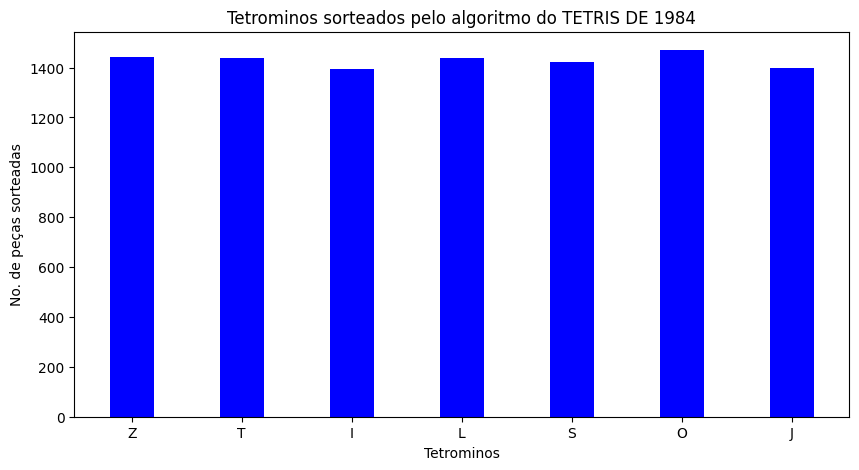

In [ ]:
#@title
#TETRIS ORIGINAL

matrizOriginal = np.zeros([7,7])

for i in range(7):
  for j in range(7):
    matrizOriginal[i][j] = 1/7

def tetris_original(n = 10000):

  tetrominos = ["L", "J", "I", "O", "Z", "S", "T"]

  tetrominos_jogo = []

  estado = randint(0, 6)

  tetrominos_jogo.append(tetrominos[estado])

  for i in range(n):

    tetrominos_possiveis = probabilidades(estado, matrizOriginal)

    estado = randint(0,6)

    tetrominos_jogo.append(tetrominos[tetrominos_possiveis[estado]])

  return tetrominos_jogo

data = distribuicao(tetris_original())

print(data)

pecas = list(data.keys())
quantidade = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(pecas, quantidade, color ='blue',
        width = 0.4)

plt.xlabel("Tetrominos")
plt.ylabel("No. de peças sorteadas")
plt.title("Tetrominos sorteados pelo algoritmo do TETRIS DE 1984")
plt.show()

{'O': 1287, 'T': 1213, 'I': 1172, 'S': 1257, 'L': 1202, 'Z': 1252, 'J': 1185}


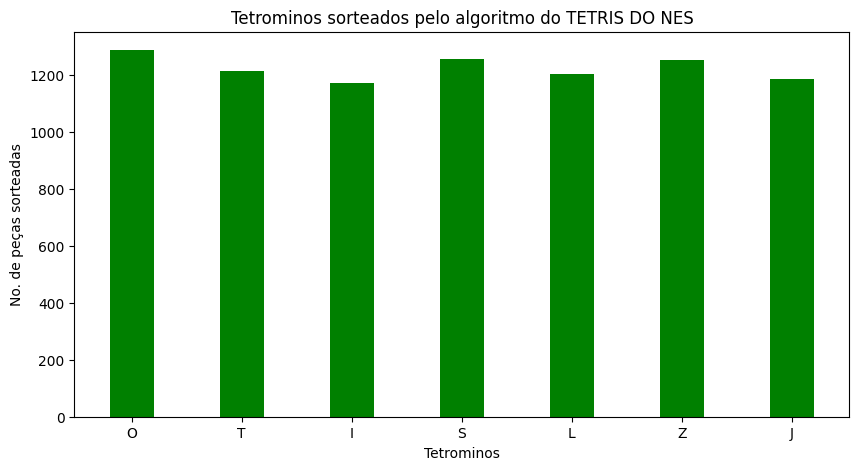

In [ ]:
#@title
#TETRIS NES

matrizNES = np.zeros([8,8])

for i in range(8):
  for j in range(8):
    if (i == j):
      matrizNES[i][j] = 0
    else:
      matrizNES[i][j] = 1/7

def tetris_nes(n = 10000):

  tetrominos = ["L", "J", "I", "O", "Z", "S", "T", "R"]

  tetrominos_jogo = []

  estado = randint(0, 6)

  tetrominos_jogo.append(tetrominos[estado])

  for i in range(n):

    tetrominos_possiveis = probabilidades(estado, matrizNES)

    estado = randint(0,6)

    t = tetrominos[tetrominos_possiveis[estado]];

    if (t != "R"):
      tetrominos_jogo.append(t)

  return tetrominos_jogo

data = distribuicao(tetris_nes())

print(data)

pecas = list(data.keys())
quantidade = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(pecas, quantidade, color ='green',
        width = 0.4)

plt.xlabel("Tetrominos")
plt.ylabel("No. de peças sorteadas")
plt.title("Tetrominos sorteados pelo algoritmo do TETRIS DO NES")
plt.show()

{'O': 1387, 'T': 1315, 'S': 1311, 'Z': 1176, 'J': 1121, 'L': 990, 'I': 1161}


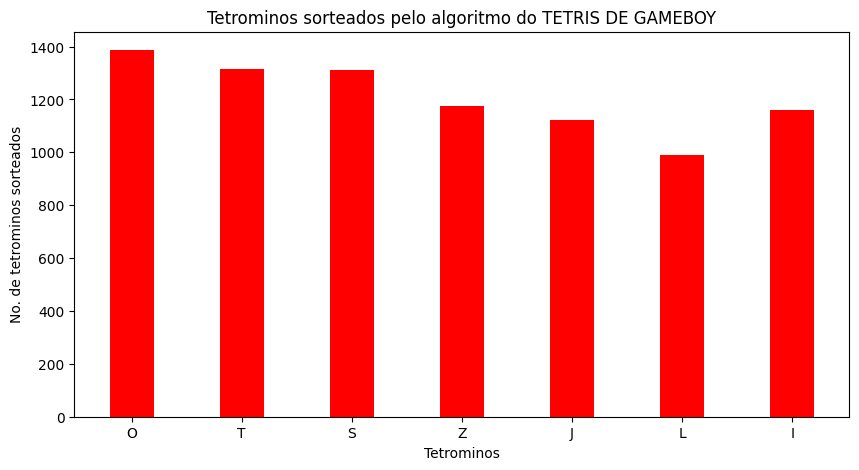

In [ ]:
#@title
#TETRIS GAMEBOY

matrizGB = np.zeros([50, 50])

for i in range(50):
    matrizGB[i] = linhaMatrizTransicao(i)

n = 10000

def tetris_gb(n = 1000):

  tetrominos = ["L", "J", "I", "O", "Z", "S", "T"]

  tetrominos_jogo = []

  estado = randint(0, 49)

  tetrominos_jogo.append(tetrominos[estado%7])

  for i in range(n):

    probs = probabilidades(estado, matrizGB)

    if (len(probs) == 7):
      estado = probs[randint(0, 6)]
    else:
      estado = probs[randint(0, 48)]

    if (estado != 49):
      tetrominos_jogo.append(tetrominos[estado%7])

  return tetrominos_jogo

data = distribuicao(tetris_gb(n))

print(data)

pecas = list(data.keys())
quantidade = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(pecas, quantidade, color ='red',
        width = 0.4)

plt.xlabel("Tetrominos")
plt.ylabel("No. de tetrominos sorteados")
plt.title("Tetrominos sorteados pelo algoritmo do TETRIS DE GAMEBOY")
plt.show()


Com a matriz de transição em mãos podemos inclusive descobrir qual a probabilidade de estarmos em um determinado estado após um tempo $n$ sem sequer termos que simular o jogo.

Para isso vamos encontrar a Função Massa Probabilidade utilizando conceitos de algebra linear.

Uma das propriedade da cadeia de Markov é de que a matriz de transição pode ser escrita como um vetor de linha estocástico:

$$x → x_{n + 1} = x_nP.$$

Assim, em um instante de tempo $n+2$ podemos escrever:

$$x_{n+2} = (x_{n+1})P = (x_nP)P = (x_n)P^2  $$

Logo:

$$x_{n+k} = (x_{n+(k-1)})P = (x_nP)P^{k-1} = (x_n)P^k$$

Da algebra linear:

  $$
  x_{n+k} = \begin{bmatrix}
 P_{0,0} & P_{0,1}  & P_{0,2} & \cdots  & P_{0,N}  &  \\
\end{bmatrix} \begin{bmatrix}
 P_{0,0} & P_{0,1}  & P_{0,2} & \cdots  & P_{0,N}  &  \\
 P_{1,0} & P_{1,1}  & P_{1,2} & \cdots  & P_{1,N}  &  \\
 P_{2,0} & P_{2,1}  & P_{2,2} & \cdots  & P_{2,N} \\
 \vdots  & \vdots  & \vdots   & \ddots  & \vdots  \\
 P_{M,0} & P_{M,1} & P_{M,2}  & \cdots  & P_{M,N}
\end{bmatrix} ^{k}
$$
$$$$
Onde nosso vetor inicial terá probabilidade 1 na coluna do estado em que escolhermos como inicial e as outras probabilidades serão 0. Podemos escolher por exemplo no vetor igual a $[0, 1, 0, 0, ..., 0]$ de tamanho $50$.

Para o caso do GameBoy teriamos:
$$$$
  $$
  x_{n+k} = \begin{bmatrix}
 0 & 1  & 0 & \cdots  0  &  \\
\end{bmatrix} \begin{bmatrix}
 0 & 1/7  & 1/7 & 1/7 & 1/7 &  \cdots & 0 & \cdots & 1/7  &  \\
 0 & 0  & 0 & 0 & 0 &\cdots  & 0 &\cdots  & 0  &  \\
 0 & 0  & 0 & 0 & 0 & \cdots  & 0 &\cdots  & 0 \\
 \vdots  & \vdots  & \vdots   & \vdots  & \vdots  & \cdots  & \vdots & \ddots & \vdots  \\
 0 & 0 & 0 & 0 & 0  & \cdots  & 1/7 & 0 & 4/7 \\
 1/49 & 1/49 & 1/49 & 1/49 & 1/49  & \cdots  & 1/49 & 1/49 & 0
  \end{bmatrix}^{k}
$$

$$$$

Realizamos então $(x_n)P^k$ com $n → ∞$, para obter as probabilidades de cada tetromino do TETRIS ser sorteado sem precisarmos sequer simular o jogo, ou o algoritmo.

In [ ]:
#@title
tetrominos_t = ["L", "J", "I", "O", "Z", "S", "T"]

#Funcao que calcula a FMP
def probabilidadesAposTempo(t:int):
    m = matrizGB

    tetromino = np.zeros([50])
    tetromino[1] = 1

    #Executa a multiplicacao do vetor inicial pela matriz de transicao t vezes
    contador = 0
    while contador < t:
        tetromino = tetromino.dot(m)
        contador += 1

    probabilidades = dict()

    #Percorre o vetor apos a multiplicacao da matriz de transicao somando as
    #probabilidades dos estados auxiliares as casas de 0 a 39
    for i, z in enumerate(tetromino):
        t = tetrominos_t[i%7]

        if (i < 49):
          if t in probabilidades:
            v = probabilidades.get(t) + z
            probabilidades.update({t : v})
          else:
            probabilidades.update({t : z})

        if (i == 49):
          probabilidades.update({"Repetições" : z})

    return probabilidades

probabilidades_t = probabilidadesAposTempo(1000000)

for i, z in enumerate(probabilidades_t.keys()):
  print(z + " = " + format(probabilidades_t.get(z), ".0%"))

print("\n")

L = 10%
J = 12%
I = 12%
O = 13%
Z = 12%
S = 13%
T = 13%
Repetições = 15%




Como vemos acima o tetromino L, possui menos chances de ser sorteado quando em comparação com outros tetrominos.

Assim analisando os gráficos e resultados obtidos acima podemos concluir que os algoritmos do NES e do jogo de 1984 eram honestos, porém o do GameBoy era enviesado sorteando menos tetrominos $L$ e mais $O$, $S$ e $T$.



#Parte III - As "secas" de tetrominos são propositais?

Alem de um algortimo enviesado outra duvida bastante comum de quem joga TETRIS é se pode acontecer que um tetromino demore a aparecer propositalmente, o que é chamado de "SECA" enquanto outros aparecem frequentemente parecendo ter uma "INUNDAÇÃO", podemos analisar os tetrominos sorteados após um número N de rodadas e usar o método de minimos quadrados para realizar um ajuste linear ou quadratico entre os pontos para responder essa pergunta.

Para isso vamos escolher um tetromino para analisar, neste caso o $I$ por sua facilidade para limpar linhas.

Vamos então usar o algoritmo que criamos para sortear Tetrominos e obter o numero de rodadas entre cada vez que um $I$ apareceu e realizar o ajuste quadratico desse valor com o tempo.

Considerando o tempo como $x$ e o tempo da seca como $y$, teremos que:

$$c_0 + c_1x + c_2x^{2} = y$$

Podemos montar então uma matriz A a partir do nosso conjunto de pontos $x$ e $y$ da forma:

$$$$
  $$
  \begin{bmatrix}
 1 & x_1 & x_1^{2} \\
 1 & x_2 & x_2^{2} \\
 1 & x_3 & x_3^{2} \\
\vdots  & \vdots \\
 1 & x_n & x_n^{2} \\
\end{bmatrix} \begin{bmatrix}
 c_0 \\
 c_1 \\
 c_2 \\
\end{bmatrix}
= \begin{bmatrix}
 y_1 \\
 y_2 \\
 y_3 \\
 \vdots \\
 y_n \\
\end{bmatrix}
$$
$$$$
Usando $A^{T} * A * c = A^{T} * y$

Temos:
$$$$

  $$
  \begin{bmatrix}
 1 & 1 & 1 & \cdots & 1 \\
 x_1 & x_2 & x_3 & \cdots & x_n\\
 x_1^{2} & x_2^{2} & x_3^{2} & \cdots & x_n^{2}\\
\end{bmatrix}
  \begin{bmatrix}
 1 & x_1 & x_1^{2} \\
 1 & x_2 & x_2^{2} \\
 1 & x_3 & x_3^{2} \\
\vdots  & \vdots \\
 1 & x_n & x_n^{2} \\
\end{bmatrix} \begin{bmatrix}
 c_0 \\
 c_1 \\
\end{bmatrix}
= \begin{bmatrix}
 1 & 1 & 1 & \cdots & 1 \\
 x_1 & x_2 & x_3 & \cdots & x_n\\
 x_1^{2} & x_2^{2} & x_3^{2} & \cdots & x_n^{2}\\
\end{bmatrix}
\begin{bmatrix}
 y_1 \\
 y_2 \\
 y_3 \\
 \vdots \\
 y_n \\
\end{bmatrix}
$$

In [ ]:
#@title
def gera_a_y_tetris(matriz, t):
  A = []
  y = []

  seca = 0

  for i, p in enumerate(matriz):
    if (p == t):
      A.append([1, i, i**2])
      y.append(seca)
      seca = 0
    else:
      seca += 1

  return A, y;

def minimos_quadrados(A,y, imprimir=True):
  A = np.array(A)

  A_t = A.transpose()

  A = A_t @ A

  b = A_t @ y

  if (imprimir):
    print('A:')
    print(A)

    print('c:')
    print([['c']*len(A.tolist())])

    print('y:')
    print(b)

  L, U, P = fatoracaoLuPivoteamentoParcial(A.tolist())

  Pb, y, c = resolveLu(L, U, P, b)

  if (imprimir):
    print('c:')
    imprimeVetorFracao(c)

  return c;

def plot(matriz_tetrominos, plt, cor, l, s=2, plot_pontos=False, imprimir_minimos=True):

  A, y = gera_a_y_tetris(matriz_tetrominos, t)

  c = minimos_quadrados(A, y, imprimir_minimos)

  x_axis = np.array(A).transpose()[1]

  if (plot_pontos):
    plt.plot(x_axis, y)

  h_x = max(x_axis)

  x_arange = np.arange(2, h_x, 4)
  c0, c1, c2 = c[0], c[1], c[2]

  y_plot = (c2*(x_arange**2)) + (c1 * x_arange) + c0

  plt.plot(x_arange, y_plot, cor, linewidth=s, label=l)

Como o produtos de $A^{T}A$ será uma matriz quadrada, podemos usar o método de decomposição LU para resolver nosso sistema linear já que A pode ser decomposta como o produto de L*U (onde U é uma triangular superior e L uma triangular inferior):

$$$$

$$Ax = b $$
$$→$$
$$LU(x)=b$$
$$→$$
$$L(Ux)=b$$
$$→$$
$$Ly=b$$
$$Uy=x$$

In [ ]:
#@title
#Fatoração LU

def linhaNova(linhaAntiga, pivo, valorLinha, linhaPivo, index, i2, print=False):

  m = valorLinha/pivo

  if (print):
    print(f'M{index}: {str(Fraction(m).limit_denominator())}')

  linhaNova = []
  linhaNovaExibicao = []
  for i in range(len(linhaPivo)):
    aux = linhaAntiga[i] - m*linhaPivo[i]
    linhaNova.append(aux)
    linhaNovaExibicao.append(str(Fraction(aux).limit_denominator()))

  if (print):
    print(f'L{index}: {linhaNovaExibicao}')

  return linhaNova

def populaMatriz(len):
  m = []

  for i in range(len):
    m.append([])
    for j in range(len):
      m[i].append(0)

  return m

def populaIdentidade(len):
  mi = populaMatriz(len)

  contador = 0

  for i in range(len):
    mi[i][contador] = 1
    contador += 1

  return mi

def eliminacaoGaussPivoteamentoParcial(matriz, print=False):
  n = len(matriz)

  p = populaIdentidade(n)

  l = populaMatriz(n)

  for i in range(n-1):

    colunas = []

    for k in range(i, n):
      colunas.append((matriz[k][i], k, abs(matriz[k][i])))

    coluna = max(colunas,key=lambda item:item[2])

    pivo = coluna[0]
    index = coluna[1]

    matrizAux = deepcopy(matriz)

    matriz[i], matriz[index] = matriz[index], matriz[i]
    l[i], l[index] = l[index], l[i]
    p[i], p[index] = p[index], p[i]

    if (matriz != matrizAux):
      if (print):
        print(f'\nHouve troca das linhas: {i+1} e {index+1}')

    if (print):
      print(f'\nPivô: {str(Fraction(pivo).limit_denominator())}\n')

    for j in range(i+1, n):
      m = (matriz[j][i] / pivo)
      l[j][i] = m
      matriz[j] = linhaNova(matriz[j], pivo, matriz[j][i], matriz[i], j+1, i)

  contador = 0
  for i in range(n):
    l[i][contador] = 1
    contador += 1

  u = matriz

  return l, u, p

def fatoracaoLuPivoteamentoParcial(matriz, print=False):

  vetorResultado = []

  matrziAux = deepcopy(matriz)

  for i in range(len(matrziAux)):
    vetorResultado.append(matrziAux[i].pop())

  L, U, P = eliminacaoGaussPivoteamentoParcial(matriz)

  if (print):
    print('\nL:')
    imprimeMatrizFracao(L)

    print('\nU:')
    imprimeMatrizFracao(U)

    print('\nP:')
    imprimeMatrizFracao(P)

  return L, U, P

def resolveLu(L, U, P, b):

  Pb = np.array(P) @ np.array(b)

  y = np.linalg.solve(L, Pb)
  x = np.linalg.solve(U, y)

  return Pb, y, x

A:
[[           129          65974       44955300]
 [         65974       44955300    34428580912]
 [      44955300    34428580912 28073788099200]]
c:
[['c', 'c', 'c']]
y:
[      867    435348 289664120]
c:

 ['4959775/813603' '4897/954880' '-1/174426'] 



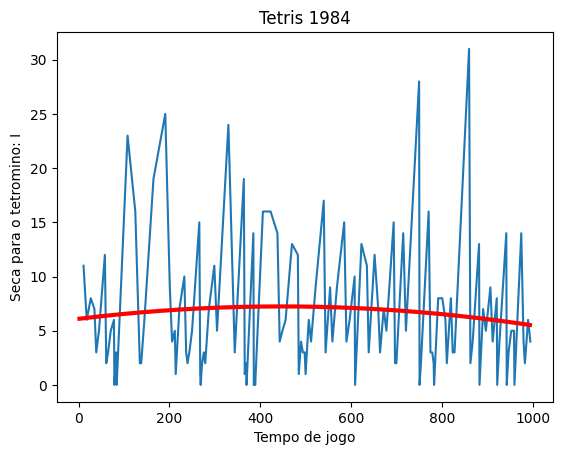

In [ ]:
#@title
n = 1000
t = 'I'

plt.close()

plt.title('Tetris 1984')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_original(n), plt, 'r', 'Original', 3, True)

plt.show()

A:
[[               1438             7154054         47781244744]
 [            7154054         47781244744     360778436544968]
 [        47781244744     360778436544968 2912136054756358852]]
c:
[['c', 'c', 'c']]
y:
[        8562     42899769 286110636701]
c:

 ['3486070/630461' '199/977806' '0'] 



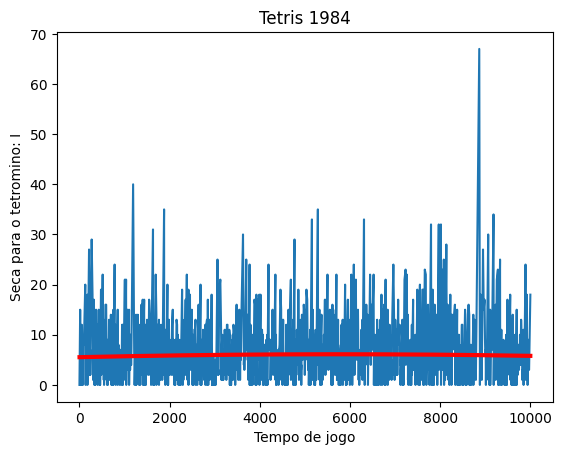

In [ ]:
#@title
n = 10000
t = 'I'

plt.close()

plt.title('Tetris 1984')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_original(n), plt, 'r', 'Original', 3, True)

plt.show()

A:
[[           118          54928       33371646]
 [         54928       33371646    22288242076]
 [      33371646    22288242076 15645467422014]]
c:
[['c', 'c', 'c']]
y:
[      729    308214 172679902]
c:

 ['5821865/993238' '1105/94646' '-1/55256'] 



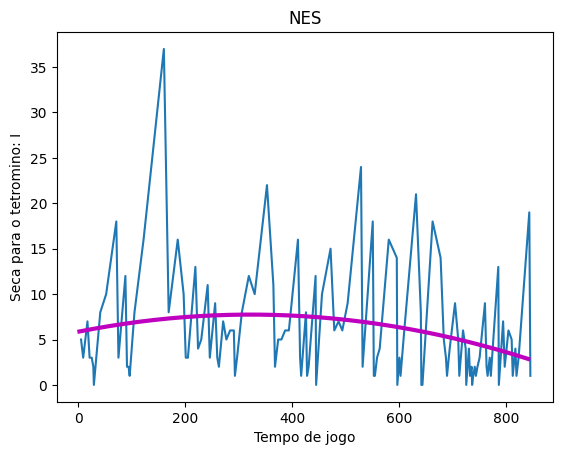

In [ ]:
#@title
n = 1000
t = 'I'

plt.title('NES')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_nes(n), plt, 'm', 'NES', 3, True)

plt.show()

A:
[[               1185             5078310         29045094968]
 [            5078310         29045094968     186785002992798]
 [        29045094968     186785002992798 1280913487003773272]]
c:
[['c', 'c', 'c']]
y:
[        7387     31705676 181294185026]
c:

 ['1877249/305594' '49/972074' '0'] 



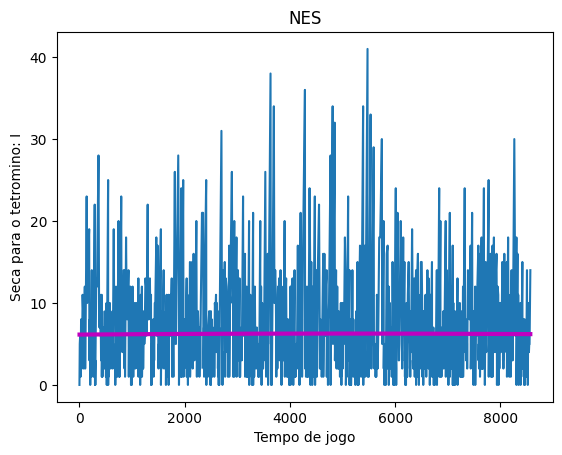

In [ ]:
#@title
n = 10000
t = 'I'

plt.title('NES')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_nes(n), plt, 'm', 'NES', 3, True)

plt.show()

A:
[[           103          44965       25326131]
 [         44965       25326131    16026219559]
 [      25326131    16026219559 10816030247663]]
c:
[['c', 'c', 'c']]
y:
[      735    311199 174832397]
c:

 ['1787962/193597' '-2011/191921' '10/993569'] 



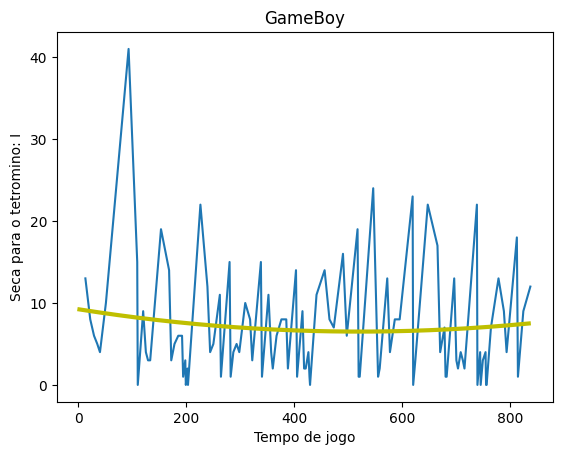

In [ ]:
#@title
n = 1000
t = 'I'

plt.title('GameBoy')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_gb(n), plt, 'y', 'GameBoy', 3, True)

plt.show()

A:
[[               1132             4781232         26854877628]
 [            4781232         26854877628     169774223881488]
 [        26854877628     169774223881488 1145474071909746012]]
c:
[['c', 'c', 'c']]
y:
[        7294     30764470 172956748630]
c:

 ['2254674/342733' '-74/898947' '0'] 



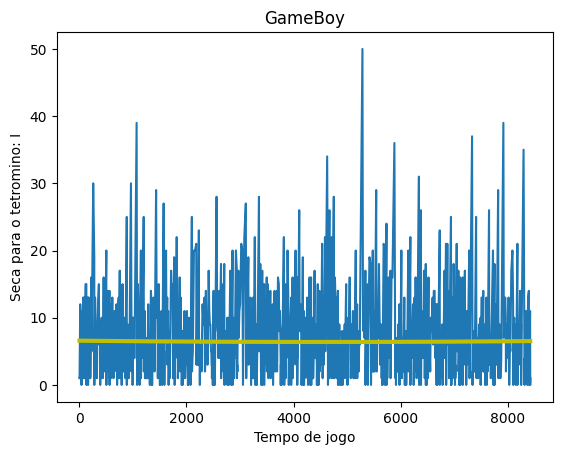

In [ ]:
#@title
n = 10000
t = 'I'

plt.title('GameBoy')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_gb(n), plt, 'y', 'GameBoy', 3, True)

plt.show()

Podemos ainda analisar o algoritmo mais recente para um jogo de TETRIS conhecido como algoritmo da mochila, que consiste em colocar 2 sets de tetrominos em uma mochila e balanca-la de forma a embaralhar os tetrominos, que são então retirados um a um da mochila até a ultima peça, para então repetir o processo.

Analisando o algoritmo acima vemos que ele para ser o mais justo de todos, sendo impossivel existir uma seca de peças, porém ainda assim podemos gerar um gráfico para ele e comparar aos demais:

In [ ]:
#@title
def mochila():

  tetrominos_m = ["J", "L", "T", "O", "Z", "S", "I", "J", "L", "T", "O", "Z", "S", "I"]

  shuffle(tetrominos_m)

  return tetrominos_m

def tetris_mochila(n = 1000):

  m = mochila()

  tetrominos_m_jogo = []

  for i in range(n):
    tetrominos_m_jogo.append(m.pop())

    if (len(m) == 0):
      m = mochila()

  return tetrominos_m_jogo;

A:
[[           142          70489       46665161]
 [         70489       46665161    34738274533]
 [      46665161    34738274533 27579497682257]]
c:
[['c', 'c', 'c']]
y:
[      852    427151 284323107]
c:

 ['1694693/289550' '165/992764' '0'] 



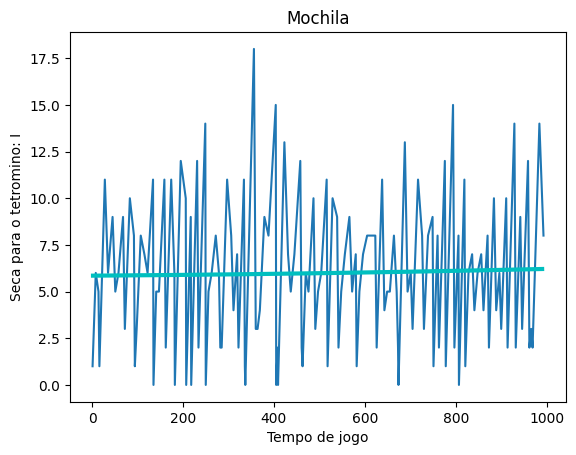

In [ ]:
#@title
n = 1000
t = 'I'

plt.title('Mochila')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_mochila(n), plt, 'c', 'Mochila', 3, True)

plt.show()

A:
[[               1428             7136394         47554531044]
 [            7136394         47554531044     356500103084730]
 [        47554531044     356500103084730 2850734998223523924]]
c:
[['c', 'c', 'c']]
y:
[        8561     42792539 285065872087]
c:

 ['5171197/866766' '4/251899' '0'] 



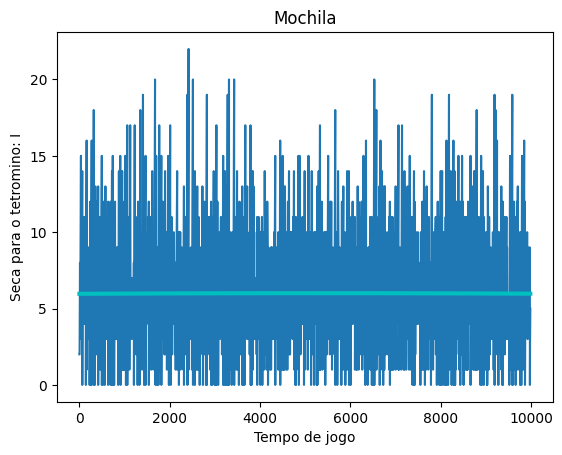

In [ ]:
#@title
n = 10000
t = 'I'

plt.title('Mochila')
plt.xlabel('Tempo de jogo')
plt.ylabel('Seca para o tetromino: ' + t)

plot(tetris_mochila(n), plt, 'c', 'Mochila', 3, True)

plt.show()

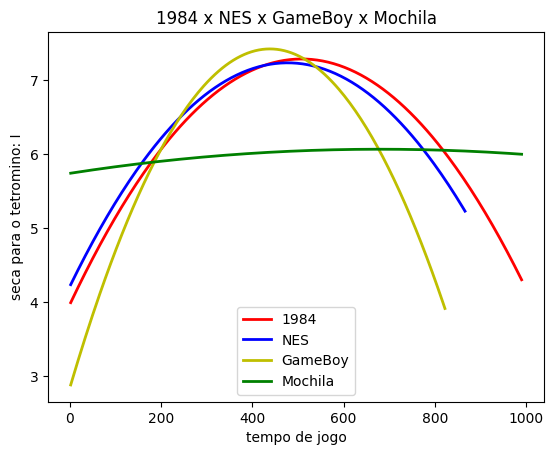

In [ ]:
#@title
n = 1000
t = 'I'

plt.close()

plt.title('1984 x NES x GameBoy x Mochila')
plt.xlabel('tempo de jogo')
plt.ylabel('seca para o tetromino: ' + t)

plot(tetris_original(n), plt, 'r', '1984', 2, False, False)
plot(tetris_nes(n), plt, 'b', 'NES', 2, False, False)
plot(tetris_gb(n), plt, 'y', 'GameBoy', 2, False, False)
plot(tetris_mochila(n), plt, 'g', 'Mochila', 2, False, False)

plt.legend()

plt.show()

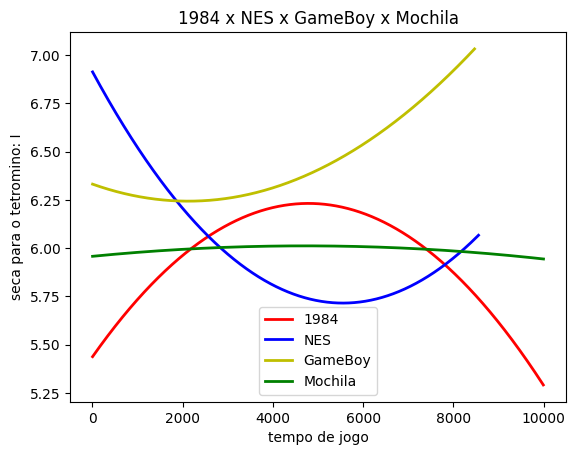

In [ ]:
#@title
n = 10000
t = 'I'

plt.close()

plt.title('1984 x NES x GameBoy x Mochila')
plt.xlabel('tempo de jogo')
plt.ylabel('seca para o tetromino: ' + t)

plot(tetris_original(n), plt, 'r', '1984', 2, False, False)
plot(tetris_nes(n), plt, 'b', 'NES', 2, False, False)
plot(tetris_gb(n), plt, 'y', 'GameBoy', 2, False, False)
plot(tetris_mochila(n), plt, 'g', 'Mochila', 2, False, False)

plt.legend()

plt.show()

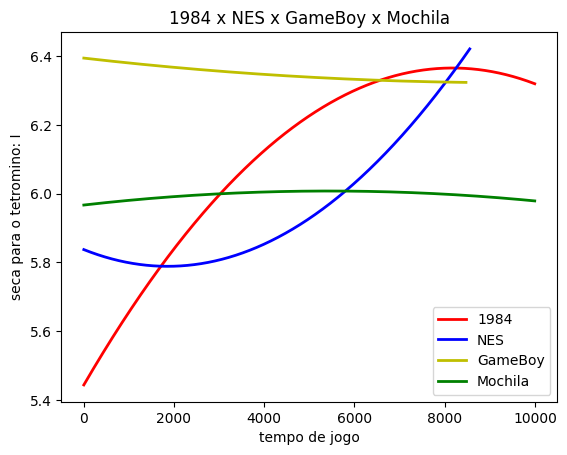

In [ ]:
#@title
n = 10000
t = 'I'

plt.close()

plt.title('1984 x NES x GameBoy x Mochila')
plt.xlabel('tempo de jogo')
plt.ylabel('seca para o tetromino: ' + t)

plot(tetris_original(n), plt, 'r', '1984', 2, False, False)
plot(tetris_nes(n), plt, 'b', 'NES', 2, False, False)
plot(tetris_gb(n), plt, 'y', 'GameBoy', 2, False, False)
plot(tetris_mochila(n), plt, 'g', 'Mochila', 2, False, False)

plt.legend()

plt.show()

Analisando então os gráficos acima entendemos porque que o algoritmo da Mochila é o utilizado para os jogos atuais de TETRIS mesmo tendo observado que os algoritmos de 1984 e do NES não são enviesados.

Isso ocorre pelo fato de que ele é o que causa menos secas de peças, se mantendo em média a cada 6 peças e sempre tendo a menor variação de picos de seca, enquanto os das outras versões de TETRIS por usarem modelos probabilisticos podem variar bastante, chegando a ter picos de 70 rodadas sem o tetromino voltar a aparecer.

Inclusive ao executarmos 3 simulações com 10 mil rodadas podemos observar a natureza probabilistica ao obtermos sempre ajustes diferentes, com exceção do algoritmo da mochila por ser o de menos variancia de picos, porém ainda assim vemos que em média os algoritmos do Tetris 1984 e do NES se aproximam do algoritmo da mochila, enquanto o de GameBoy possui uma média de secas levemente maior.

Com essa analise podemos afirmar que os momentos de secas prolongadas nos algoritmos de 1984, NES e GameBoy, se devem a sua natureza probabilistica e sem um limite possuir limitador para a seca, portanto elas de fato ocorrem porém não são propositais, e são menores no algoritmo da Mochila, justificando o fato dele ser considerado o mais honest e ser o mais usado hoje.

# REFERÊNCIAS




[Harddrop - TETRIS Wiki - GameBoy](https://harddrop.com/wiki/Tetris_(Game_Boy))

[Harddrop - TETRIS Wiki - 1984](https://harddrop.com/wiki/Tetris_(Electronika_60))

[Harddrop - TETRIS Wiki - NES](https://harddrop.com/wiki/Tetris_(NES,_Nintendo))

[Harddrop - TETRIS Wiki - Bag Randomizer](https://harddrop.com/wiki/Bag_randomizer)

[Rotação de Matriz](https://math.stackexchange.com/questions/1676441/how-to-rotate-the-positions-of-a-matrix-by-90-degrees)

[Canvas](https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API/Tutorial/Drawing_shapes)

[Trabalho da disciplina de DevWeb I onde usei o Canvas anteriormente, com alguns outros conceitos de algebra linear em 2022.2](https://github.com/luizferreira7/tiroAoAlvo)

[Trabalho sobre Monopoly e Cadeias de Markov realizado na disciplina de Probabilidade e Estatistica em 2022.2](https://colab.research.google.com/drive/16a65o9hLNXqSFmsqTmOLEurnj3tdR1yh?usp=sharing)

[Dominating Monopoly Using Markov Chains](https://www.youtube.com/watch?v=Mh5r0a23TO4)

[Matriz de Probabilidades de Transição - Cadeia de Markov](https://www.youtube.com/watch?v=NKESrlCLBF0)

[Exploring strategies in Monopoly using Markov chains and simulation
by Albert Nilsson](http://uu.diva-portal.org/smash/get/diva2:1471765/FULLTEXT01.pdf)

[Cadeias de Markov](https://pt.wikipedia.org/wiki/Cadeias_de_Markov)

[stackoverflow](https://stackoverflow.com)